# ETL Process

### Import some libraries that may be useful

In [58]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import holidays
import matplotlib.pyplot as plt

## Data Extracting

In [59]:
# cd ..

In [60]:
pwd

'/Users/lijiaze/Desktop/2023-1/CITS5504/Projects/Project1/23266049_CITS5504_Project1'

In [61]:
crime1 = pd.read_csv("./CrimeDatasets/crime.csv")

/var/folders/gh/kv0y6dqx7n1cx32335c_21lc0000gp/T/ipykernel_27944/3340851537.py:1: DtypeWarning: Columns (5,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime1 = pd.read_csv("./CrimeDatasets/crime.csv")


In [62]:
crime2 = pd.read_csv("CrimeDatasets/crime_25471_50000.csv")
crime3 = pd.read_csv("CrimeDatasets/crime_50001_75000.csv")
crime4 = pd.read_csv("CrimeDatasets/crime_75001_100000.csv")
crime5 = pd.read_csv("CrimeDatasets/crime_100001_125000.csv")
crime6 = pd.read_csv("CrimeDatasets/crime_125001_150000.csv")
crime7 = pd.read_csv("CrimeDatasets/crime_150001_175000.csv")
crime8 = pd.read_csv("CrimeDatasets/crime_175001_200000.csv")
crime9 = pd.read_csv("CrimeDatasets/crime_200001_225000.csv")

In [63]:
crime3.head()

,Unnamed: 0.1,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
0,50001,50001,LARCENY-NON VEHICLE,130301252,01/30/2013,477 PEACHTREE ST NE,509,Downtown,M,33.76764,-84.38524,house_number,Peachtree Street Northeast,NaN,Atlanta,Fulton County,Georgia,30308.0,United States
1,50002,50002,LARCENY-NON VEHICLE,130301278,01/30/2013,3535 PEACHTREE RD NE,210,Lenox,B,33.85182,-84.35950,shop,Prichard Way Northeast,NaN,Atlanta,Fulton County,Georgia,30326.0,United States
2,50003,50003,AUTO THEFT,130301304,01/30/2013,213 FAIRBURN ROAD,111,Adamsville,H,33.76137,-84.50423,house_number,Fairburn Road,NaN,Atlanta,Fulton County,Georgia,30331.0,United States
3,50004,50004,AGG ASSAULT,130301325,01/30/2013,1081 CATO STREET NW,110,Grove Park,J,33.78508,-84.45552,house_number,Cato Street Northwest,West Highland,Atlanta,Fulton County,Georgia,30318.0,United States
4,50005,50005,LARCENY-NON VEHICLE,130301463,01/30/2013,850 OAK ST SW @WEST END MALL,401,West End,T,33.74053,-84.41671,office,Oak Street Southwest,West End,Atlanta,Fulton County,Georgia,30310.0,United States


In [64]:
crime3 = crime3.drop(columns=['Unnamed: 0.1'])

In [65]:
crime3.head()

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
0,50001,LARCENY-NON VEHICLE,130301252,01/30/2013,477 PEACHTREE ST NE,509,Downtown,M,33.76764,-84.38524,house_number,Peachtree Street Northeast,NaN,Atlanta,Fulton County,Georgia,30308.0,United States
1,50002,LARCENY-NON VEHICLE,130301278,01/30/2013,3535 PEACHTREE RD NE,210,Lenox,B,33.85182,-84.35950,shop,Prichard Way Northeast,NaN,Atlanta,Fulton County,Georgia,30326.0,United States
2,50003,AUTO THEFT,130301304,01/30/2013,213 FAIRBURN ROAD,111,Adamsville,H,33.76137,-84.50423,house_number,Fairburn Road,NaN,Atlanta,Fulton County,Georgia,30331.0,United States
3,50004,AGG ASSAULT,130301325,01/30/2013,1081 CATO STREET NW,110,Grove Park,J,33.78508,-84.45552,house_number,Cato Street Northwest,West Highland,Atlanta,Fulton County,Georgia,30318.0,United States
4,50005,LARCENY-NON VEHICLE,130301463,01/30/2013,850 OAK ST SW @WEST END MALL,401,West End,T,33.74053,-84.41671,office,Oak Street Southwest,West End,Atlanta,Fulton County,Georgia,30310.0,United States


## Data Concatenating

### Clean up the first Crime data - Delete data after line 25470

In [66]:
# View data in row 25471
crime1.iloc[25471]

Unnamed: 0                         25471
crime                         AUTO THEFT
number                         100051597
date                          01/05/2010
location                1947 DETROIT AVE
beat                                 107
neighborhood                  Grove Park
npu                                    J
lat                             33.76722
long                           -84.45058
type                                 NaN
road                                 NaN
neighbourhood_lookup                 NaN
city                                 NaN
county                               NaN
state                                NaN
postcode                             NaN
country                              NaN
Name: 25471, dtype: object

In [67]:
# Delete row 25470 and all rows after it
crime_clean = crime1.drop(index=range(25470, len(crime1)))

In [68]:
crime_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25470 entries, 0 to 25469
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            25470 non-null  int64  
 1   crime                 25470 non-null  object 
 2   number                25470 non-null  int64  
 3   date                  25470 non-null  object 
 4   location              25469 non-null  object 
 5   beat                  25470 non-null  object 
 6   neighborhood          24397 non-null  object 
 7   npu                   25290 non-null  object 
 8   lat                   25470 non-null  float64
 9   long                  25470 non-null  float64
 10  type                  25470 non-null  object 
 11  road                  24897 non-null  object 
 12  neighbourhood_lookup  15747 non-null  object 
 13  city                  25279 non-null  object 
 14  county                25470 non-null  object 
 15  state              

### Data Merging

In [69]:
crime_full = pd.concat([crime_clean, crime2, crime3, crime4, crime5, crime6, crime7, crime8, crime9])

In [70]:
crime_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            225000 non-null  int64  
 1   crime                 225000 non-null  object 
 2   number                225000 non-null  int64  
 3   date                  225000 non-null  object 
 4   location              224998 non-null  object 
 5   beat                  225000 non-null  object 
 6   neighborhood          215237 non-null  object 
 7   npu                   223241 non-null  object 
 8   lat                   225000 non-null  float64
 9   long                  225000 non-null  float64
 10  type                  225000 non-null  object 
 11  road                  219456 non-null  object 
 12  neighbourhood_lookup  137173 non-null  object 
 13  city                  222960 non-null  object 
 14  county                225000 non-null  object 
 15  s

In [71]:
crime_full.head()

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
0,0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,house_number,Spring Street Northwest,NaN,Atlanta,Fulton County,Georgia,30308.0,United States
1,1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680,office,Oak Street Southwest,West End,Atlanta,Fulton County,Georgia,30310.0,United States
2,2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,shop,Metropolitan Parkway Southwest,Capitol View,Atlanta,Fulton County,Georgia,30310.0,United States
3,3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,house_number,Pryor Street,NaN,Atlanta,Fulton County,Georgia,30315.0,United States
4,4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,house_number,John Wesley Dobbs Avenue Northeast,Inman Park,Atlanta,Fulton County,Georgia,30312.0,United States


## Data Cleaning

### Dropping Columns

#### 1. Delete columns with a single value

In [72]:
def unique_values(col):
    print('Unique values in column "{}":'.format(col.name))
    print(col.unique())
    print()

crime_full.apply(unique_values, axis=0)

Unique values in column "Unnamed: 0":
[     0      1      2 ... 224998 224999 225000]

Unique values in column "crime":
['LARCENY-NON VEHICLE' 'AUTO THEFT' 'LARCENY-FROM VEHICLE'
 'BURGLARY-RESIDENCE' 'ROBBERY-PEDESTRIAN' 'AGG ASSAULT' 'RAPE'
 'BURGLARY-NONRES' 'HOMICIDE' 'ROBBERY-RESIDENCE' 'ROBBERY-COMMERCIAL']

Unique values in column "number":
[103040029 103040061 103040169 ... 102300011 102300046 102300081]

Unique values in column "date":
['10/31/2010' '10/30/2010' '10/29/2010' ... '08/20/2010' '08/19/2010'
 '08/18/2010']

Unique values in column "location":
['610 SPRING ST NW' '850 OAK ST SW' '1344 METROPOLITAN PKWY SW' ...
 '1642 WOODLAND AVENUE' '1096 RIDGE AVE SW' '90 CHAUMONT SQ NW']

Unique values in column "beat":
['509' '401' '301' '307' '604' '205' '410' '201' '602' '109' '210' '211'
 '508' '303' '308' '605' '609' '212' '207' '114' '507' '505' '101' '305'
 '607' '603' '409' '411' '611' '404' '111' '412' '208' '104' '108' '601'
 '106' '612' '501' '511' '503' '213' '406' '

Unnamed: 0              None
crime                   None
number                  None
date                    None
location                None
beat                    None
neighborhood            None
npu                     None
lat                     None
long                    None
type                    None
road                    None
neighbourhood_lookup    None
city                    None
county                  None
state                   None
postcode                None
country                 None
dtype: object

As country, state and city all have the same value, the location attribute can be reduced to more specific information such as county, road, neighbourhood, npu etc. This reduces the complexity of storing and processing data and also improves accuracy and usability. This reduces the complexity of data storage and processing, avoids data redundancy, and also improves the accuracy and availability of the data.

In [73]:
sandy_springs_rows = crime_full[crime_full['city'] == 'Sandy Springs']
sandy_springs_rows

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
19939,45410,AUTO THEFT,163281817,11/23/2016,4 WHITEWATER TRL NW,202,Whitewater Creek,A,33.87957,-84.43944,road,East Palisades,NaN,Sandy Springs,Fulton County,Georgia,30339.0,United States


In this project we only focus on Atlanta city, disregard 'Sandy Springs' for less redundancy.

In [74]:
# Delete the only one city line which is equal to "Sandy Springs"
crime_full = crime_full[crime_full['city'] != 'Sandy Springs']

In [75]:
crime_full = crime_full.drop(columns=['city'])
crime_full = crime_full.drop(columns=['state'])
crime_full = crime_full.drop(columns=['country'])

#### 2. Delete neighbourhood_lookup column due to too many missing values

In [76]:
print(crime_full.isnull().sum())

Unnamed: 0                  0
crime                       0
number                      0
date                        0
location                    2
beat                        0
neighborhood             9763
npu                      1759
lat                         0
long                        0
type                        0
road                     5544
neighbourhood_lookup    87826
county                      0
postcode                  168
dtype: int64


In [77]:
# Calculating the missing rate
null_counts_neighbourhood_lookup_full = crime_full['neighbourhood_lookup'].isnull().sum()
null_rates_neighbourhood_lookup_full = null_counts_neighbourhood_lookup_full / len(crime_full) * 100
print(f"{null_rates_neighbourhood_lookup_full}%")

39.03395126200561%


Calculations show a deletion rate of neighbourhood_lookup almost reach 40%, well above the common standard for high deletion rates (greater than 5% or 10%), so deletion was considered.

In [78]:
crime_full = crime_full.drop(columns=['neighbourhood_lookup'])

#### 3. Dropping not useful columns

postcode, number, Unnamed: 0, Lat column and Long column need to be dropped since they are not used in this project.

In [79]:
crime_full = crime_full.drop(columns=['Unnamed: 0'])
crime_full = crime_full.drop(columns=['postcode'])
crime_full = crime_full.drop(columns=['number'])
crime_full = crime_full.drop(columns=['lat'])
crime_full = crime_full.drop(columns=['long'])

### Time values issue

#### 1. Convert date to datetime type

In [80]:
crime_full['date'] = pd.to_datetime(crime_full['date'])

# Add columns for year, quarter, month, day of week, date, etc. --- Big Data 4s
crime_full['Year'] = crime_full['date'].dt.year
crime_full['Quarter'] = crime_full['date'].dt.quarter.apply(lambda x: f"Q{x}")
crime_full['Month'] = crime_full['date'].dt.month.apply(lambda x: pd.Timestamp(year=2022, month=x, day=1).strftime('%B'))
crime_full['Weekday'] = crime_full['date'].dt.strftime('%A')
crime_full['Day'] = crime_full['date'].dt.day

#### 2. Add column to determine if it is a public holiday

In [81]:
# !pip install holidays

In [82]:
us_holidays = holidays.US(years=range(2009, 2018))

crime_full['date'] = pd.to_datetime(crime_full['date'])

crime_full['PublicHoliday'] = crime_full['date'].apply(lambda x: us_holidays.get(x, 'NotHoliday'))

# Merge the holiday names of "(Observed)"
crime_full['PublicHoliday'].replace('Christmas Day (Observed)', 'Christmas Day', inplace=True)
crime_full['PublicHoliday'].replace("New Year's Day (Observed)", "New Year's Day", inplace=True)
crime_full['PublicHoliday'].replace('Veterans Day (Observed)', 'Veterans Day', inplace=True)
crime_full['PublicHoliday'].replace('Independence Day (Observed)', 'Independence Day', inplace=True)

print("Unique values in column \"PublicHoliday\":")
print(crime_full['PublicHoliday'].unique())

Unique values in column "PublicHoliday":
['NotHoliday' 'Columbus Day' 'Martin Luther King Jr. Day' "New Year's Day"
 'Thanksgiving' 'Veterans Day' 'Christmas Day' "Washington's Birthday"
 'Memorial Day' 'Independence Day']


### Missing values issue

In [83]:
crime_full['location'] = crime_full['location'].fillna('Unknown')
crime_full['neighborhood'] = crime_full['neighborhood'].fillna('Unknown')
crime_full['npu'] = crime_full['npu'].fillna('Unknown')
crime_full['road'] = crime_full['road'].fillna('Unknown')

In [84]:
# Check for missing values
print(crime_full.isnull().sum())

crime            0
date             0
location         0
beat             0
neighborhood     0
npu              0
type             0
road             0
county           0
Year             0
Quarter          0
Month            0
Weekday          0
Day              0
PublicHoliday    0
dtype: int64


### Location values issue

In [85]:
crime_full['location'].head()

0                           610 SPRING ST NW
1                              850 OAK ST SW
2                  1344 METROPOLITAN PKWY SW
3                           1752 PRYOR RD SW
4    JOHN WESLEY DOBBS AVE NE / CORLEY ST NE
Name: location, dtype: object

Although the symbols @, /, (), etc. appear in the location, they all have their own specific meaning, e.g. after @ it means the specific type of building in the location, after / it may mean that the location is uncertain or comes between the two locations, and in () it means the specific location. So we should keep them and only remove the ';', which affects the analysis, and remove the extra spaces

In [86]:
def clean_location(location):
    location = location.replace(';', '')
    location = re.sub(r'\s+', ' ', location)
    location = location.strip()
    return location

crime_full['location'] = crime_full['location'].apply(clean_location)

### Police Area values issue

In [87]:
# manually collect zones from the pattern of beats
def get_zone(beat):
    if beat.startswith('1'):
        return 'Zone1'
    elif beat.startswith('2'):
        return 'Zone2'
    elif beat.startswith('3'):
        return 'Zone3'
    elif beat.startswith('4'):
        return 'Zone4'
    elif beat.startswith('5'):
        return 'Zone5'
    elif beat.startswith('6'):
        return 'Zone6'
    elif beat.startswith('7'):
        return 'Zone7'
    elif beat.startswith('0'):
        return 'Zone7'
    else:
        return 'Unknown'

In [88]:
crime_full['beat'] = crime_full['beat'].astype(str)
crime_full['Zone'] = crime_full['beat'].apply(get_zone)

In [89]:
crime_full.head()

,crime,date,location,beat,neighborhood,npu,type,road,county,Year,Quarter,Month,Weekday,Day,PublicHoliday,Zone
0,LARCENY-NON VEHICLE,2010-10-31,610 SPRING ST NW,509,Downtown,M,house_number,Spring Street Northwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone5
1,AUTO THEFT,2010-10-31,850 OAK ST SW,401,West End,T,office,Oak Street Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone4
2,LARCENY-FROM VEHICLE,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,shop,Metropolitan Parkway Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3
3,AUTO THEFT,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,house_number,Pryor Street,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3
4,LARCENY-NON VEHICLE,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,house_number,John Wesley Dobbs Avenue Northeast,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone6


### Crime Type values issue

In [90]:
def get_crime_type(crime):
    if crime in ['LARCENY-NON VEHICLE', 'LARCENY-FROM VEHICLE', 'BURGLARY-RESIDENCE', 'BURGLARY-NONRES', 'AUTO THEFT']:
        return 'Property Crime'
    elif crime in ['ROBBERY-PEDESTRIAN', 'ROBBERY-RESIDENCE', 'ROBBERY-COMMERCIAL']:
        return 'Robbery'
    elif crime in ['AGG ASSAULT', 'RAPE']:
        return 'Violent Crime'
    elif crime in ['HOMICIDE']:
        return 'Homicide'
    else:
        return 'Other'

crime_full['CrimeType'] = crime_full['crime'].apply(lambda x: get_crime_type(x))

In [91]:
crime_full.head()

,crime,date,location,beat,neighborhood,npu,type,road,county,Year,Quarter,Month,Weekday,Day,PublicHoliday,Zone,CrimeType
0,LARCENY-NON VEHICLE,2010-10-31,610 SPRING ST NW,509,Downtown,M,house_number,Spring Street Northwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone5,Property Crime
1,AUTO THEFT,2010-10-31,850 OAK ST SW,401,West End,T,office,Oak Street Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone4,Property Crime
2,LARCENY-FROM VEHICLE,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,shop,Metropolitan Parkway Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3,Property Crime
3,AUTO THEFT,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,house_number,Pryor Street,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3,Property Crime
4,LARCENY-NON VEHICLE,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,house_number,John Wesley Dobbs Avenue Northeast,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone6,Property Crime


### Building Type values issue

In [92]:
# Print out all the different Building Types
print("Unique values in column \"Building Type\":")
print(crime_full['type'].unique())

Unique values in column "Building Type":
['house_number' 'office' 'shop' 'road' 'building' 'amenity' 'tourism'
 'city' 'historic' 'leisure' 'aeroway' 'neighbourhood' 'man_made'
 'landuse' 'suburb' 'quarter' 'retail' 'highway' 'place' 'town' 'railway'
 'craft' 'residential' 'club' 'county' 'hamlet' 'healthcare' 'emergency']


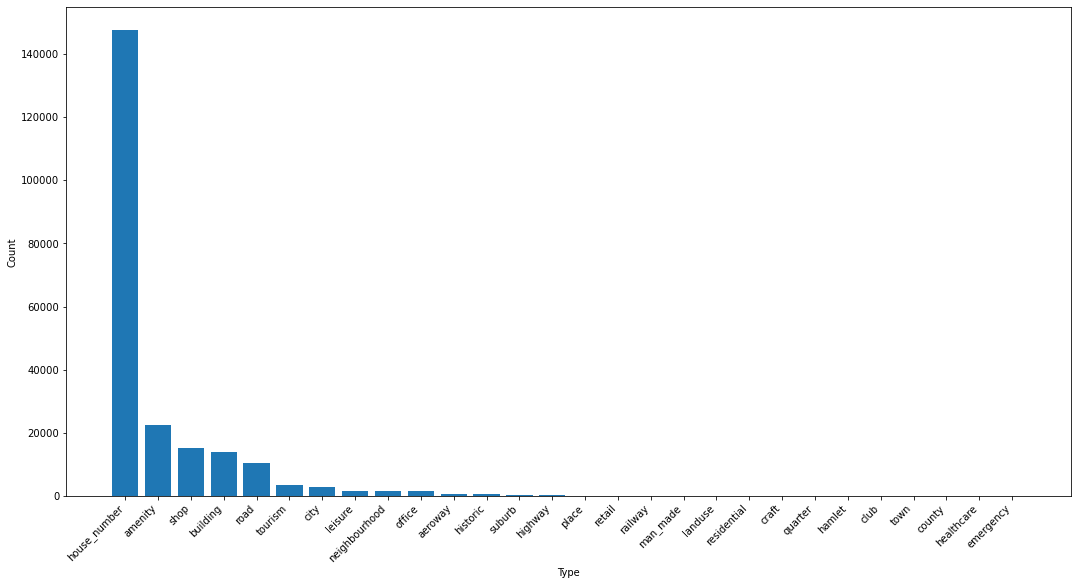

In [93]:
# Count the number of occurrences of each type value
type_counts = crime_full['type'].value_counts()

plt.figure(figsize=(18, 9))
plt.bar(type_counts.index, type_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [94]:
type_counts = crime_full['type'].value_counts()

print(type_counts)

house_number     147371
amenity           22505
shop              15339
building          13941
road              10572
tourism            3594
city               2873
leisure            1805
neighbourhood      1704
office             1560
aeroway             853
historic            784
suburb              486
highway             352
place               255
retail              191
railway             134
man_made            131
landuse             113
residential         109
craft               105
quarter              69
hamlet               57
club                 50
town                 42
county                2
healthcare            1
emergency             1
Name: type, dtype: int64


In [95]:
crime_full = crime_full.rename(columns={'type': 'SubBuildingType'})

In [96]:
def classify_type(x):
    if x in ['house_number', 'residential', 'neighbourhood', 'quarter']:
        return 'Residential'
    elif x in ['amenity', 'shop', 'retail', ]:
        return 'Commercial/Service'
    elif x in ['building', 'office', 'man_made']:
        return 'Office'
    elif x in ['healthcare', 'emergency']:
        return 'Medical'
    elif x in ['road', 'highway', 'railway', 'aeroway']:
        return 'Transportation'
    elif x in ['tourism', 'historic']:
        return 'Tourism'
    elif x in ['club','leisure']:
        return 'Entertainment'
    elif x in ['city', 'town', 'suburb', 'hamlet', 'county']:
        return 'Urban/Rural'
    else:
        return 'Other'

crime_full['BuildingType'] = crime_full['SubBuildingType'].apply(classify_type)

### Attribute name normalization

In [97]:
crime_full = crime_full.rename(columns={'crime': 'SubCrimeType', 'date': 'Date', 'location': 'Location', 
                        'beat': 'Beat', 'neighborhood': 'Neighborhood', 'npu': 'NPU', 'road': 'Road', 'county': 'County'})

In [98]:
crime_full.head()

,SubCrimeType,Date,Location,Beat,Neighborhood,NPU,SubBuildingType,Road,County,Year,Quarter,Month,Weekday,Day,PublicHoliday,Zone,CrimeType,BuildingType
0,LARCENY-NON VEHICLE,2010-10-31,610 SPRING ST NW,509,Downtown,M,house_number,Spring Street Northwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone5,Property Crime,Residential
1,AUTO THEFT,2010-10-31,850 OAK ST SW,401,West End,T,office,Oak Street Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone4,Property Crime,Office
2,LARCENY-FROM VEHICLE,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,shop,Metropolitan Parkway Southwest,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3,Property Crime,Commercial/Service
3,AUTO THEFT,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,house_number,Pryor Street,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone3,Property Crime,Residential
4,LARCENY-NON VEHICLE,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,house_number,John Wesley Dobbs Avenue Northeast,Fulton County,2010,Q4,October,Sunday,31,NotHoliday,Zone6,Property Crime,Residential


##  Design Fact table and Dimension tables

### Dimension Tables

#### DimTime

In [99]:
dfTime = crime_full[['Year', 'Quarter', 'Month', 'PublicHoliday', 'Weekday', 'Date']]
dfTime = dfTime.drop_duplicates().reset_index(drop=True)
dfTime['TimeKey'] = range(1, len(dfTime) + 1)

#### DimLocation

In [100]:
dfLocation = crime_full[['County', 'NPU', 'Neighborhood', 'Road', 'Location']]
dfLocation = dfLocation.drop_duplicates().reset_index(drop=True)
dfLocation['LocationKey'] = range(1, len(dfLocation) + 1)

#### DimCrimeType

In [101]:
dfCrimeType = crime_full[['CrimeType', 'SubCrimeType']]
dfCrimeType = dfCrimeType.drop_duplicates().reset_index(drop=True)
dfCrimeType['CrimeTypeKey'] = range(1, len(dfCrimeType) + 1)

#### DimPoliceArea

In [102]:
dfPoliceArea = crime_full[['Zone', 'Beat']]
dfPoliceArea = dfPoliceArea.drop_duplicates().reset_index(drop=True)
dfPoliceArea['PoliceAreaKey'] = range(1, len(dfPoliceArea) + 1)

#### DimBuildingType

In [103]:
dfBuildingType = crime_full[['BuildingType', 'SubBuildingType']]
dfBuildingType = dfBuildingType.drop_duplicates().reset_index(drop=True)
dfBuildingType['BuildingTypeKey'] = range(1, len(dfBuildingType) + 1)

### Fact Table

#### Generate Fact Table with all foreign keys

In [104]:
dfAll = crime_full[['Year', 'Quarter', 'Month', 'PublicHoliday', 'Weekday', 'Date', 'County', 'NPU', 'Neighborhood', 'Road', 'Location', 'BuildingType', 'SubBuildingType', 'Zone', 'Beat', 'CrimeType', 'SubCrimeType']]
dfAll = pd.merge(dfAll, dfTime, on=['Year', 'Quarter', 'Month','PublicHoliday', 'Weekday', 'Date'], how='left')
dfAll = pd.merge(dfAll, dfLocation, on=['County', 'NPU', 'Neighborhood', 'Road', 'Location'], how='left')
dfAll = pd.merge(dfAll, dfCrimeType, on=['CrimeType', 'SubCrimeType'], how='left')
dfAll = pd.merge(dfAll, dfPoliceArea, on=['Zone', 'Beat'], how='left')
dfAll = pd.merge(dfAll, dfBuildingType, on=['BuildingType', 'SubBuildingType'], how='left')

In [105]:
dfAll.head()

,Year,Quarter,Month,PublicHoliday,Weekday,Date,County,NPU,Neighborhood,Road,...,SubBuildingType,Zone,Beat,CrimeType,SubCrimeType,TimeKey,LocationKey,CrimeTypeKey,PoliceAreaKey,BuildingTypeKey
0,2010,Q4,October,NotHoliday,Sunday,2010-10-31,Fulton County,M,Downtown,Spring Street Northwest,...,house_number,Zone5,509,Property Crime,LARCENY-NON VEHICLE,1,1,1,1,1
1,2010,Q4,October,NotHoliday,Sunday,2010-10-31,Fulton County,T,West End,Oak Street Southwest,...,office,Zone4,401,Property Crime,AUTO THEFT,1,2,2,2,2
2,2010,Q4,October,NotHoliday,Sunday,2010-10-31,Fulton County,X,Capitol View Manor,Metropolitan Parkway Southwest,...,shop,Zone3,301,Property Crime,LARCENY-FROM VEHICLE,1,3,3,3,3
3,2010,Q4,October,NotHoliday,Sunday,2010-10-31,Fulton County,Y,Betmar LaVilla,Pryor Street,...,house_number,Zone3,307,Property Crime,AUTO THEFT,1,4,2,4,1
4,2010,Q4,October,NotHoliday,Sunday,2010-10-31,Fulton County,M,Old Fourth Ward,John Wesley Dobbs Avenue Northeast,...,house_number,Zone6,604,Property Crime,LARCENY-NON VEHICLE,1,5,1,5,1


In [106]:
dfFact = dfAll[['TimeKey', 'LocationKey', 'CrimeTypeKey', 'PoliceAreaKey', 'BuildingTypeKey']]

#### Add CrimeCount and AtlantaCrimeID into Fact table

In [107]:
dfFact['CrimeCount']=1
# surrogate key
dfFact['AtlantaCrimeID'] = range(1, len(dfFact) + 1)

/var/folders/gh/kv0y6dqx7n1cx32335c_21lc0000gp/T/ipykernel_27944/2736513343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFact['CrimeCount']=1
/var/folders/gh/kv0y6dqx7n1cx32335c_21lc0000gp/T/ipykernel_27944/2736513343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFact['AtlantaCrimeID'] = range(1, len(dfFact) + 1)


In [108]:
dfFact

,TimeKey,LocationKey,CrimeTypeKey,PoliceAreaKey,BuildingTypeKey,CrimeCount,AtlantaCrimeID
0,1,1,1,1,1,1,1
1,1,2,2,2,2,1,2
2,1,3,3,3,3,1,3
3,1,4,2,4,1,1,4
4,1,5,1,5,1,1,5
...,...,...,...,...,...,...,...
224994,2506,2604,4,66,1,1,224995
224995,2507,1020,3,12,4,1,224996
224996,2507,7059,1,31,1,1,224997
224997,2507,78226,4,46,4,1,224998


## Output csv files

In [109]:
pwd

'/Users/lijiaze/Desktop/2023-1/CITS5504/Projects/Project1/23266049_CITS5504_Project1'

In [110]:
dfFact.head()

,TimeKey,LocationKey,CrimeTypeKey,PoliceAreaKey,BuildingTypeKey,CrimeCount,AtlantaCrimeID
0,1,1,1,1,1,1,1
1,1,2,2,2,2,1,2
2,1,3,3,3,3,1,3
3,1,4,2,4,1,1,4
4,1,5,1,5,1,1,5


In [111]:
# # Exporting individual dimension tables and fact tables to CSV files
# dfTime.to_csv('CSVfiles_1000/DimTime.csv', index=False, header=False)
# dfLocation.to_csv('CSVfiles_1000/DimLocation.csv', index=False, header=False)
# dfCrimeType.to_csv('CSVfiles_1000/DimCrimeType.csv', index=False, header=False)
# dfPoliceArea.to_csv('CSVfiles_1000/DimPoliceArea.csv', index=False, header=False)
# dfBuildingType.to_csv('CSVfiles_1000/DimBuildingType.csv', index=False, header=False)
# dfFact.to_csv('CSVfiles_1000/Fact.csv', index=False, header=False)

In [112]:
month_counts = dfTime['Month'].value_counts()
print(month_counts)

January     279
February    254
October     248
December    248
March       248
May         248
July        248
November    240
April       240
June        240
August       14
Name: Month, dtype: int64


In [113]:
dfTime

,Year,Quarter,Month,PublicHoliday,Weekday,Date,TimeKey
0,2010,Q4,October,NotHoliday,Sunday,2010-10-31,1
1,2010,Q4,October,NotHoliday,Saturday,2010-10-30,2
2,2010,Q4,October,NotHoliday,Friday,2010-10-29,3
3,2010,Q4,October,NotHoliday,Thursday,2010-10-28,4
4,2010,Q4,October,NotHoliday,Wednesday,2010-10-27,5
...,...,...,...,...,...,...,...
2502,2010,Q3,August,NotHoliday,Sunday,2010-08-22,2503
2503,2010,Q3,August,NotHoliday,Saturday,2010-08-21,2504
2504,2010,Q3,August,NotHoliday,Friday,2010-08-20,2505
2505,2010,Q3,August,NotHoliday,Thursday,2010-08-19,2506
